# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
## 1) Test 1:-

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&q=" + city
query_url

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city ; also converting the temperature as Celsius instead of Farenheit with (units=metric)
    city_url = f"{url}appid={weather_api_key}&units={unit}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | palikir - national government center
Processing Record 3 of Set 1 | zaozersk
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | sampit
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | melilla
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | afaahiti
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | christchurch
Processing Record 18 of Set 1 | college
Processing Record 19 of Set 1 | la punta
Processing Record 20 of Set 1 | san luis de la loma
Processing Record 21 of Set 1 | lebork
Processing Record 2

Processing Record 38 of Set 4 | kristiansund
Processing Record 39 of Set 4 | malvan
Processing Record 40 of Set 4 | kazanskoye
Processing Record 41 of Set 4 | dryden
Processing Record 42 of Set 4 | port alfred
Processing Record 43 of Set 4 | kapuskasing
Processing Record 44 of Set 4 | albany
Processing Record 45 of Set 4 | puerto aysen
Processing Record 46 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 47 of Set 4 | northam
Processing Record 48 of Set 4 | lihue
Processing Record 49 of Set 4 | punta arenas
Processing Record 0 of Set 5 | barra do corda
Processing Record 1 of Set 5 | damavand
Processing Record 2 of Set 5 | zhangye
Processing Record 3 of Set 5 | pionerskiy
Processing Record 4 of Set 5 | puerto rico
Processing Record 5 of Set 5 | madang
Processing Record 6 of Set 5 | mildura
Processing Record 7 of Set 5 | santa terezinha
Processing Record 8 of Set 5 | yreka
Processing Record 9 of Set 5 | jabor
Processing Record 10 of Set 5 | tionk essil
Processing Record

Processing Record 29 of Set 8 | tanjung pandan
Processing Record 30 of Set 8 | afif
Processing Record 31 of Set 8 | dubbo
Processing Record 32 of Set 8 | revda
Processing Record 33 of Set 8 | jijiga
Processing Record 34 of Set 8 | todtnau
Processing Record 35 of Set 8 | madison heights
Processing Record 36 of Set 8 | pangody
Processing Record 37 of Set 8 | jiayuguan
Processing Record 38 of Set 8 | nguigmi
Processing Record 39 of Set 8 | kingston
Processing Record 40 of Set 8 | cairns city
City not found. Skipping...
Processing Record 41 of Set 8 | besisahar
Processing Record 42 of Set 8 | vastervik
City not found. Skipping...
Processing Record 43 of Set 8 | berdigestyakh
Processing Record 44 of Set 8 | linden
Processing Record 45 of Set 8 | oranjemund
Processing Record 46 of Set 8 | puerto francisco de orellana
Processing Record 47 of Set 8 | nadym
Processing Record 48 of Set 8 | bosaso
Processing Record 49 of Set 8 | nova xavantina
Processing Record 0 of Set 9 | crane
Processing Recor

Processing Record 18 of Set 12 | bluefields
Processing Record 19 of Set 12 | taulaga
Processing Record 20 of Set 12 | lata
Processing Record 21 of Set 12 | crixas
Processing Record 22 of Set 12 | bandarbeyla
Processing Record 23 of Set 12 | chernyshevskiy
Processing Record 24 of Set 12 | zyryanskoye
Processing Record 25 of Set 12 | haiku-pauwela
Processing Record 26 of Set 12 | arar
Processing Record 27 of Set 12 | 'ain benian
Processing Record 28 of Set 12 | senanga
Processing Record 29 of Set 12 | simanggang
Processing Record 30 of Set 12 | port macquarie
Processing Record 31 of Set 12 | sur
Processing Record 32 of Set 12 | gaspe
Processing Record 33 of Set 12 | kone
Processing Record 34 of Set 12 | brandon
Processing Record 35 of Set 12 | tralee
Processing Record 36 of Set 12 | mbandaka
Processing Record 37 of Set 12 | canitas de felipe pescador
Processing Record 38 of Set 12 | brookings
Processing Record 39 of Set 12 | kharkhorin
Processing Record 40 of Set 12 | misratah
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.59,87,100,7.69,TF,1698251326
1,palikir - national government center,6.9248,158.1611,24.41,94,40,1.54,FM,1698251326
2,zaozersk,69.4005,32.4476,-7.33,96,67,2.35,RU,1698251326
3,olonkinbyen,70.9221,-8.7187,2.15,91,99,4.47,SJ,1698251326
4,sampit,-2.5333,112.9500,23.77,94,8,1.07,ID,1698251326


In [6]:
# Highlight the data types from the above Data Frame
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [7]:
# Convert the date from an integer format to a readable date format (yyyy-mm-dd)
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.59,87,100,7.69,TF,2023-10-25
1,palikir - national government center,6.9248,158.1611,24.41,94,40,1.54,FM,2023-10-25
2,zaozersk,69.4005,32.4476,-7.33,96,67,2.35,RU,2023-10-25
3,olonkinbyen,70.9221,-8.7187,2.15,91,99,4.47,SJ,2023-10-25
4,sampit,-2.5333,112.9500,23.77,94,8,1.07,ID,2023-10-25


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_file.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_file.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.59,87,100,7.69,TF,2023-10-25
1,palikir - national government center,6.9248,158.1611,24.41,94,40,1.54,FM,2023-10-25
2,zaozersk,69.4005,32.4476,-7.33,96,67,2.35,RU,2023-10-25
3,olonkinbyen,70.9221,-8.7187,2.15,91,99,4.47,SJ,2023-10-25
4,sampit,-2.5333,112.9500,23.77,94,8,1.07,ID,2023-10-25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

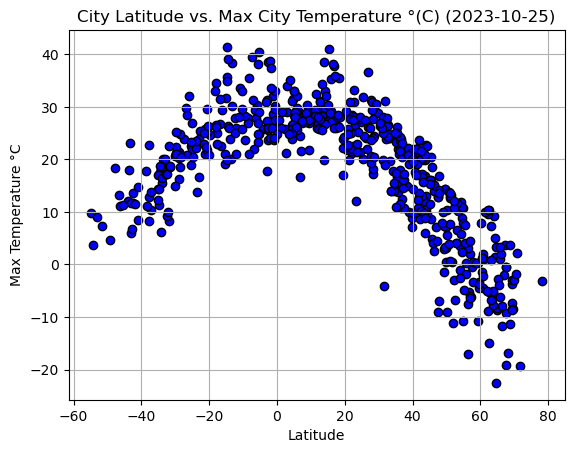

This scatter plot shows the corresponding city latitudes' vs. the maximum temperatures for each of these cities. It helps to 
 define the relationship between latitude and maximum temperature of cities that exist in both the northern and southern 
 hemispheres.


In [15]:
# Build scatter plot for latitude vs. temperature
x_values_lat = city_data_df["Lat"]
y_values_temp = city_data_df["Max Temp"]


# Incorporate the other graph properties
plt.scatter(x_values_lat, y_values_temp, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
plt.title("City Latitude vs. Max City Temperature °(C) (2023-10-25)")
plt.grid()


# Save the figure
plt.savefig("../output_data/Figure1(Lat_Vs_Temp).png")

# Show plot
plt.show()
print("This scatter plot shows the corresponding city latitudes' vs. the maximum temperatures for each of these cities. It helps to \n define the relationship between latitude and maximum temperature of cities that exist in both the northern and southern \n hemispheres.")


#### Latitude Vs. Humidity

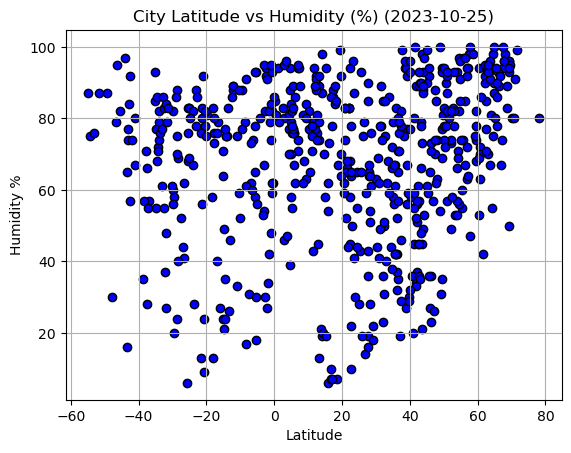

This scatter plot shows the corresponding city latitudes' vs. the humidity % in each city. No relationship seems to exist 
 between latitude and humidity of cities that exist in both the northern and southern hemispheres.


In [17]:
# Build the scatter plots for latitude vs. humidity
x_values_lat = city_data_df["Lat"]
y_values_humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values_lat, y_values_humidity, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs Humidity (%) (2023-10-25)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Figure2(Lat_Vs_Humidity).png")

# Show plot
plt.show()
print("This scatter plot shows the corresponding city latitudes' vs. the humidity % in each city. No relationship seems to exist \n between latitude and humidity of cities that exist in both the northern and southern hemispheres.")

#### Latitude Vs. Cloudiness

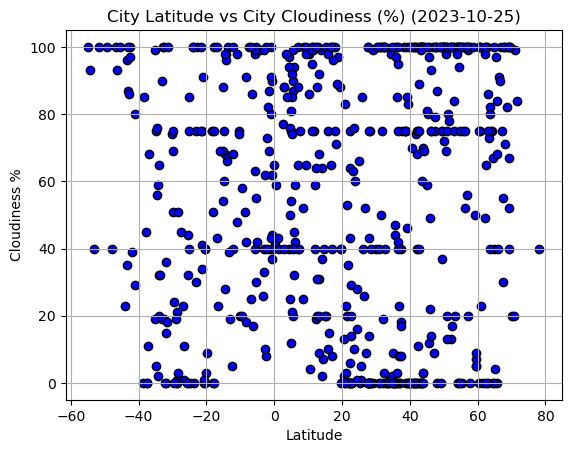

This scatter plot shows the corresponding city latitudes' vs. the cloudiness % in each city. No relationship seems to exist 
 between latitude and cloudiness of cities that exist in both the northern and southern hemispheres.


In [19]:
# Build the scatter plots for latitude vs. cloudiness
x_values_lat = city_data_df["Lat"]
y_values_clouds = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values_lat, y_values_clouds, marker="o", facecolors = 'blue', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs City Cloudiness (%) (2023-10-25)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Figure3(Lat_Vs_Cloudiness).png")

# Show plot
plt.show()
print("This scatter plot shows the corresponding city latitudes' vs. the cloudiness % in each city. No relationship seems to exist \n between latitude and cloudiness of cities that exist in both the northern and southern hemispheres.")

#### Latitude vs. Wind Speed Plot

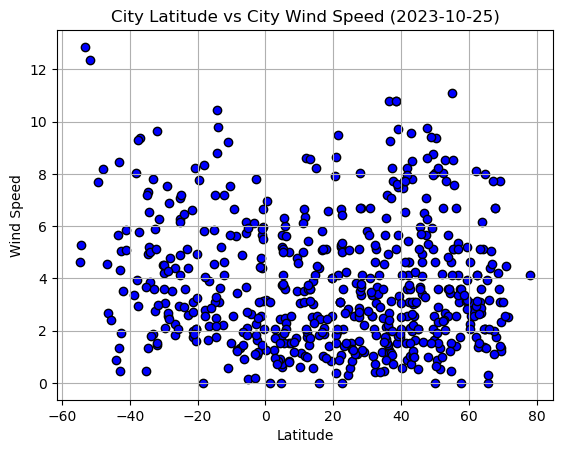

This scatter plot shows the corresponding city latitudes' vs. the wind speed of each city. No relationship seems to exist 
 between latitude and wind speed of cities that exist in both the northern and southern hemispheres.


In [20]:
# Build the scatter plots for latitude vs. wind speed
x_values_lat = city_data_df["Lat"]
y_values_wind = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values_lat, y_values_wind, marker="o", facecolors = "blue", edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs City Wind Speed (2023-10-25)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Figure4(Lat_Vs_Windspeed).png")

# Show plot
plt.show()
print("This scatter plot shows the corresponding city latitudes' vs. the wind speed of each city. No relationship seems to exist \n between latitude and wind speed of cities that exist in both the northern and southern hemispheres.")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)


# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temperature in Northern Hemisphere")

# Define a function to create Linear Regression plots
def LR_PLOT(x,y,name,v_ax,hem):
    (slope, intercept, rvalue, pvalue, stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {v_ax} - {hem}')
    plt.xlabel('Latitude')
    plt.ylabel(v_ax)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.annotate(line_eq, fontsize=15, color='r')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'Linear equation: {line_eq}')
    print(f'The r-value is: {rvalue}')

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_LatVsMaxTemp'
v_ax = 'Maximum Temperature C°'
hem = 'Northern Hemisphere'
LR_PLOTV2(x,y,name,vbl,hemi)
plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,palikir - national government center,6.9248,158.1611,24.41,94,40,1.54,FM,2023-10-25
2,zaozersk,69.4005,32.4476,-7.33,96,67,2.35,RU,2023-10-25
3,olonkinbyen,70.9221,-8.7187,2.15,91,99,4.47,SJ,2023-10-25
7,bilibino,68.0546,166.4372,-16.81,98,71,1.77,RU,2023-10-25
8,melilla,35.2937,-2.9383,26.11,56,0,5.66,ES,2023-10-25


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.59,87,100,7.69,TF,2023-10-25
4,sampit,-2.5333,112.9500,23.77,94,8,1.07,ID,2023-10-25
5,grytviken,-54.2811,-36.5092,3.65,75,93,5.27,GS,2023-10-25
6,adamstown,-25.0660,-130.1015,22.48,83,85,7.06,PN,2023-10-25
9,waitangi,-43.9535,-176.5597,12.12,97,23,0.89,NZ,2023-10-25


In [28]:
# Define a function to create Linear Regression plots  [Northern Hemisphere]
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

def LR_PLOT(x,y,name,v_ax,hem):
    (slope, intercept, rvalue, pvalue, stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {v_ax} - {hem}')
    plt.xlabel('Latitude')
    plt.ylabel(v_ax)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.annotate(line_eq, (30,20), fontsize=15, color='r')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'Linear equation: {line_eq}')
    print(f'The r-value is: {rvalue}')

In [29]:
# Define a function to create Linear Regression plots  [Southern Hemisphere]
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

def LR_PLOT_1(x,y,name,v_ax,hem):
    (slope, intercept, rvalue, pvalue, stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {v_ax} - {hem}')
    plt.xlabel('Latitude')
    plt.ylabel(v_ax)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.annotate(line_eq, (-30,20), fontsize=15, color='r')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'Linear equation: {line_eq}')
    print(f'The r-value is: {rvalue}')

In [39]:
# Define a function to create Linear Regression plots  [Northern Hemisphere - Wind Speed Chart Analysis]
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

def LR_PLOT_2(x,y,name,v_ax,hem):
    (slope, intercept, rvalue, pvalue, stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {v_ax} - {hem}')
    plt.xlabel('Latitude')
    plt.ylabel(v_ax)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.annotate(line_eq, (10,10), fontsize=15, color='r')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'Linear equation: {line_eq}')
    print(f'The r-value is: {rvalue}')

In [40]:
# Define a function to create Linear Regression plots  [Southern Hemisphere - Wind Speed Chart Analysis]
#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

def LR_PLOT_3(x,y,name,v_ax,hem):
    (slope, intercept, rvalue, pvalue, stderror)=linregress(x,y)
    reg_values= x*slope + intercept
    plt.plot(x,reg_values,color='r')
    plt.title(f'Latitude vs. {v_ax} - {hem}')
    plt.xlabel('Latitude')
    plt.ylabel(v_ax)
    line_eq = f'y = {(round(slope,2))}x + {(round(intercept,2))}'
    plt.annotate(line_eq, (-50,10), fontsize=15, color='r')
    plt.savefig(f"../output_data/LinearRegresion_{name}.png")
    print(f'Linear equation: {line_eq}')
    print(f'The r-value is: {rvalue}')

###  Temperature vs. Latitude Linear Regression Plot

Linear equation: y = -0.57x + 36.59
The r-value is: -0.8575915481877139


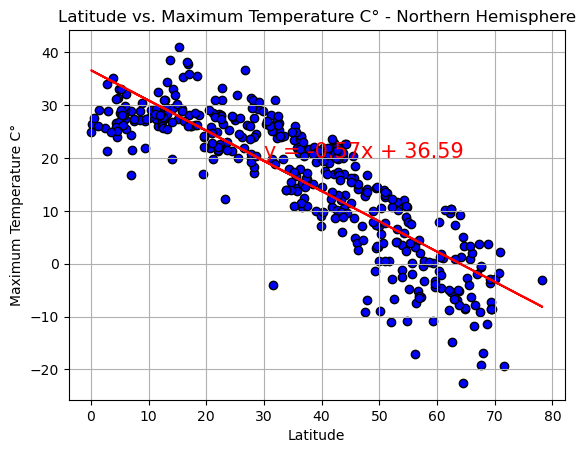

In [43]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
name = 'NH_TempVsLatitude'
v_ax = 'Maximum Temperature C°'
hem = 'Northern Hemisphere'
LR_PLOT(x,y,name,v_ax,hem)
plt.show()

Linear equation: y = 0.44x + 32.25
The r-value is: 0.7727217514465099


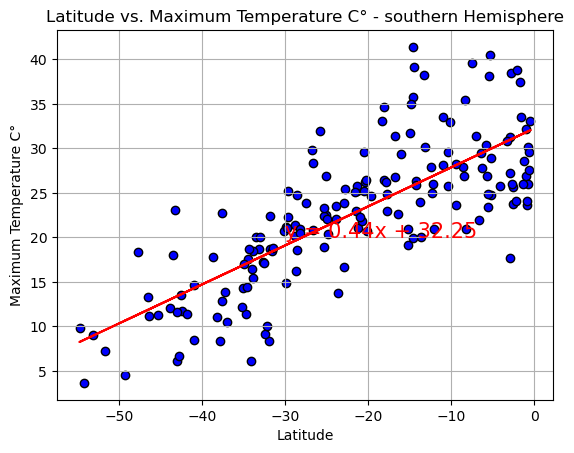

In [44]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
name = 'SH_TempVsLatitude'
v_ax = 'Maximum Temperature C°'
hem = 'southern Hemisphere'
LR_PLOT_1(x,y,name,v_ax,hem)
plt.show()

**Discussion about the linear relationship:**

The main understanding behind linear relationships can be easily explained with an r-value that is associated with the respective plot. The closer the r-value is to 1 (or -1), the linear relationship can be considered to be either perfectly positively or perfectly negatively correlated.
Based on the analysis of the above charts, the northern hemisphere plot depicting temperature vs latitude, has an r-value of -0.86, indicating a strong negative linear correlation, which in turn means that as the latitude keeps increasing from the top of the northern hemisphere to the centre of the equator, the temperature readings start to decrease past the 37th latitude. While on the southern hemisphere, a strong positive linear correlation is observed, with an R-value of 0.77, which states that as the latitude keeps increasing from the bottom of the southern hemisphere to the centre of the equator, the temperature readings start to increase past the 32nd latitude. Therefore, the maximum temperature keeps increasing as we approach the centre of the equator from both hemispheres. But, it is important to note that this is not a perfect correlation, as there could be other factors to consider with how the temperature fluctuates.

### Humidity vs. Latitude Linear Regression Plot

Linear equation: y = 0.2x + 61.78
The r-value is: 0.17584029101673992


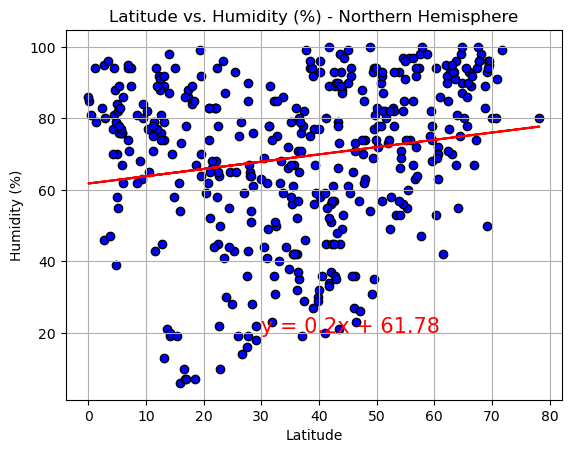

In [45]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
name = 'NH_HumidityVsLatitude'
v_ax = 'Humidity (%)'
hem = 'Northern Hemisphere'
LR_PLOT(x,y,name,v_ax,hem)
plt.show()

Linear equation: y = -0.11x + 63.23
The r-value is: -0.06903449931265154


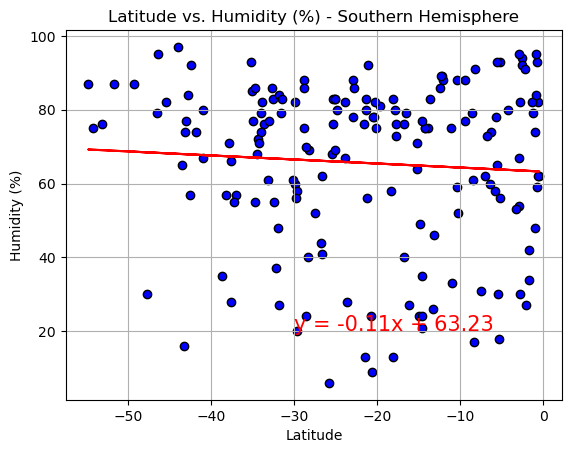

In [46]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
name = 'SH_HumidityVsLatitude'
v_ax = 'Humidity (%)'
hem = 'Southern Hemisphere'
LR_PLOT_1(x,y,name,v_ax,hem)
plt.show()

**Discussion about the linear relationship:** 

The main understanding behind linear relationships can be easily explained with an r-value that is associated with the respective plot. The closer the r-value is to 1 (or -1), the linear relationship can be considered to be either perfectly positively or perfectly negatively correlated. Based on the analysis of the above charts, the northern hemisphere plot depicting humidity and latitude, has an R-value of 0.18, indicating a very weak correlation that is virtually non-existent between latitude and humidity. The analysis is also similar for the southern hemisphere plots between humidity and latitude, where the r-value is only -0.07, which indicates that the correlation between latitude and humidity is very weak for the south hemisphere as well. Since humidity and latitude don't seem to provide any existence of a correlation between them. It is safe to assume that humidity in certain regions can be affected by the proximity and quantity of water bodies close to certain geographical regions. 

### Cloudiness vs. Latitude Linear Regression Plot

Linear equation: y = 0.21x + 48.33
The r-value is: 0.10187526693811812


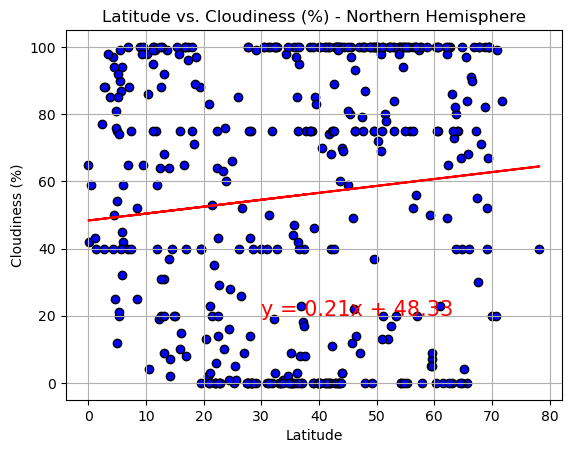

In [47]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
name = 'NH_CloudinessVsLatitude'
v_ax = 'Cloudiness (%)'
hem = 'Northern Hemisphere'
LR_PLOT(x,y,name,v_ax,hem)
plt.show()

Linear equation: y = 0.1x + 55.38
The r-value is: 0.03941379679725202


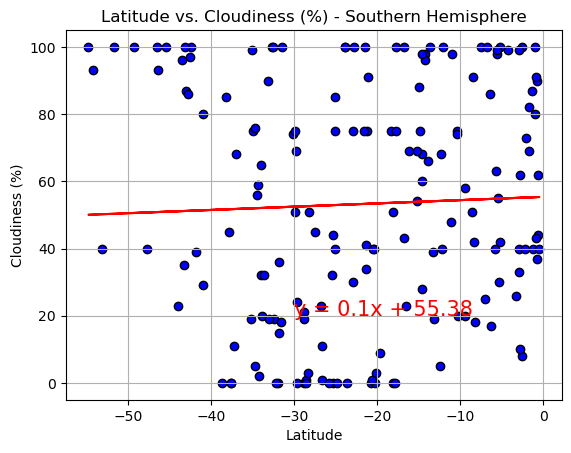

In [48]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
name = 'SH_CloudinessVsLatitude'
v_ax = 'Cloudiness (%)'
hem = 'Southern Hemisphere'
LR_PLOT_1(x,y,name,v_ax,hem)
plt.show()

**Discussion about the linear relationship:**

The main understanding behind linear relationships can be easily explained with an r-value that is associated with the respective plot. The closer the r-value is to 1 (or -1), the linear relationship can be considered to be either perfectly positively or perfectly negatively correlated.Based on the analysis of the above charts, the northern hemisphere plot depicting cloudiness and latitude, has an R-value of 0.10, indicating a very weak correlation that is virtually non-existent between latitude and cloudiness. The analysis is also similar for the southern hemisphere plots between cloudiness and latitude, where the r-value is only 0.04, which is even closer to 0, and it basically states that there is no correlation between the two variables. Since, the earlier example where humidity and latitude had a very weak correlation as well, it is safe to assume that the variability between cloudiness and latitude would not be any different, since the level of cloudiness can be partially explained by the trace amounts of humidity that seem to exist in certain geographical regions.

### Wind Speed vs. Latitude Linear Regression Plot

Linear equation: y = 0.01x + 3.05
The r-value is: 0.11238111645562715


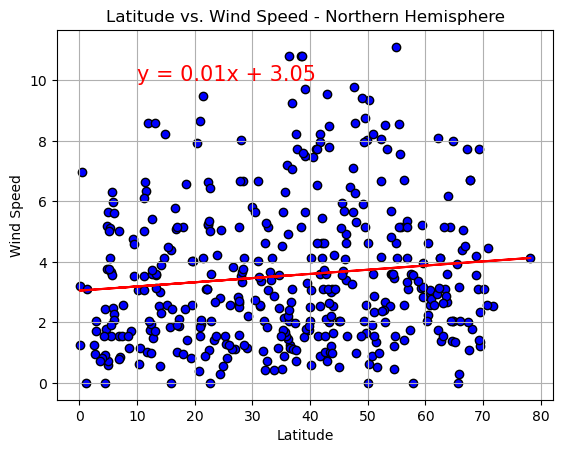

In [49]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
name = 'NH_WindSpeedVsLatitude'
v_ax = 'Wind Speed'
hem = 'Northern Hemisphere'
LR_PLOT_2(x,y,name,v_ax,hem)
plt.show()

Linear equation: y = -0.04x + 3.34
The r-value is: -0.22920803235681717


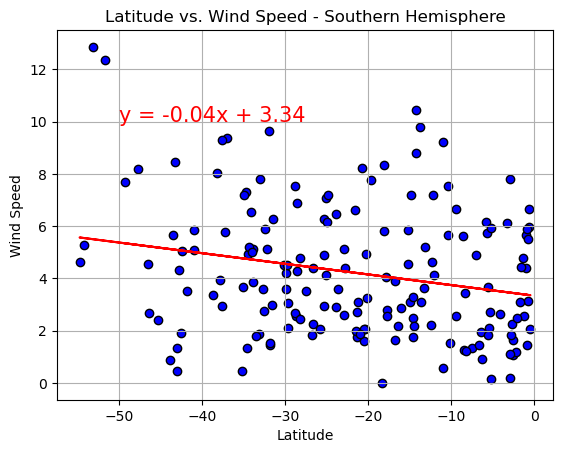

In [50]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], marker='o', facecolors='blue', edgecolors='black')

# Incorporate the other graph properties
plt.grid()

x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
name = 'SH_WindSpeedVsLatitude'
v_ax = 'Wind Speed'
hem = 'Southern Hemisphere'
LR_PLOT_3(x,y,name,v_ax,hem)
plt.show()

**Discussion about the linear relationship:** 

The main understanding behind linear relationships can be easily explained with an r-value that is associated with the respective plot. The closer the r-value is to 1 (or -1), the linear relationship can be considered to be either perfectly positively or perfectly negatively correlated.Based on the analysis of the above charts, the northern hemisphere plot depicting wind speed and latitude, has an R-value of 0.11, indicating a very weak correlation that is virtually non-existent between latitude and cloudiness. However, the analysis for the southern hemisphere plots between wind speed and latitude, where the r-value is -0.23. This basically states that there is an inkling of a negative correlation that is quite weak between the two variables. It is important to understand that wind speed can be affected by a multitude of factors, and latitude itself is not a good indicator of how wind speed can be measured in different geographical regions.